# PROJECT NAME:-Comcast Telecom Consumer Complaints


#### The given information is as follows:
Data Dictionary
Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

#### Now we need to do Analysis first for this data set.
#### So here this can be done as following:

#### First need to import all needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

#### First task is to:
Import data into Python environment

In [4]:
df = pd.read_csv(r"C:\Users\rautn\Downloads\1568699544_comcast_telecom_complaints_data (1)\Comcast_telecom_complaints_data.csv")
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


#### Here its done.

#### Now we need to check all data-types

In [4]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
df["Date_index"] = df["Date_month_year"] + " " + df["Time"]
df["Date_index"].to_frame

,Date_index
0,22-Apr-15 3:53:50 PM
1,04-Aug-15 10:22:56 AM
2,18-Apr-15 9:55:47 AM
3,05-Jul-15 11:59:35 AM
4,26-May-15 1:25:26 PM
...,...
2219,04-Feb-15 9:13:18 AM
2220,06-Feb-15 1:24:39 PM
2221,06-Sep-15 5:28:41 PM
2222,23-Jun-15 11:13:30 PM


#### Now we need to convert into date time to access easily.

In [6]:
df["Date_index"] = pd.to_datetime(df["Date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])

In [7]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Date_index                     datetime64[ns]
dtype: object

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


#### We need to make it as index for creating it in a good and simple way.

In [9]:
df.set_index(["Date_index"])

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_index,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 09:13:18,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2015-02-06 13:24:39,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2015-09-06 17:28:41,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No


In [10]:
df = df.set_index(["Date_index"])


In [11]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_index,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [12]:
df["Date_month_year"].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-02-05      7
2015-12-05      7
2015-05-04      6
2015-03-05      5
2015-11-04      5
Name: Date_month_year, Length: 91, dtype: int64

In [13]:
df["Date_month_year"].value_counts()[:5]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64

#### We need to get maximum number of complaints by month.

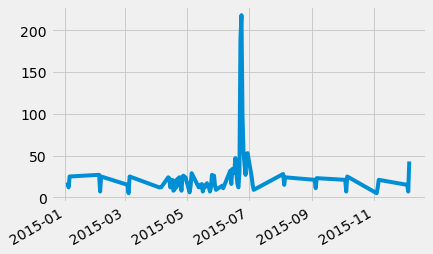

In [24]:
df["Date_month_year"].value_counts().plot();

In [25]:
df["month"] = df.Date_month_year.dt.month

#### here its done for month

<AxesSubplot:xlabel='month'>

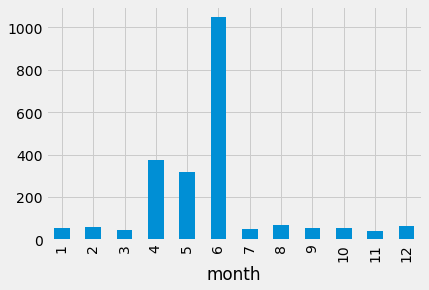

In [26]:
df.groupby("month").count()['Ticket #'].plot(kind = 'bar')

#### Here its done for maximum complaints by date.

<AxesSubplot:xlabel='Date'>

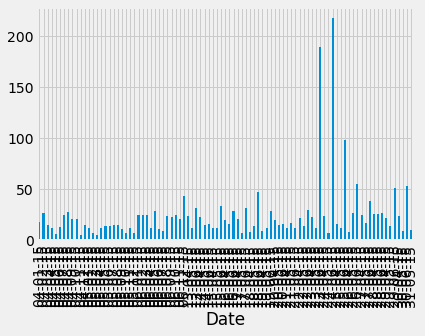

In [28]:
df['Customer Complaint'].groupby(df.Date).count().plot(kind = 'bar')

#### Task was to Provide the trend chart for the number of complaints at monthly and daily granularity levels. and here its done.

#### Now we need to Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [30]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [33]:
df["newStatus"] = ["Open" if (status == "Open" or status == "Pending") else "Closed" for status in df["Status"]]

In [34]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,newStatus
Date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed


#### Here we displayed the perticular count of complaints as per state.

In [35]:
df.groupby(["State"]).size()

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
Michigan                115
Minnesota                33
Mississippi              39
Missouri                  4
Montana                   1
Nevada                    1
New Hampshire            12
New Jersey               75
New Mexico               15
New York                  6
North Carolina            3
Ohio                      3
Oregon                   49
Pennsylvania            130
Rhode Island              1
South Carolina

In [40]:
df.groupby(["State"]).size().sort_values(ascending = False).to_frame().reset_index().rename({0: "Count"}, axis = 1)[:10]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [43]:
status_complaints = df.groupby(["State", "newStatus"]).size().unstack().fillna(0)
status_complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


#### Here's its done for that.

#### Now we need to  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [11]:
status_complaints.plot(kind = 'barh', figsize=(20, 30), stacked = True)

NameError: name 'status_complaints' is not defined

#### Here's its done.

## INSIGHT: 
#### Georgia state has maximum complaints.
#### Georgia  state has the highest percentage of unresolved complaints.
         


In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud, STOPWORDS

In [60]:
df["Customer Complaint"].values

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [61]:
text = df["Customer Complaint"].values

In [66]:
wc = WordCloud(width=200, height=100, background_color="black", stopwords=STOPWORDS).generate(str(text))

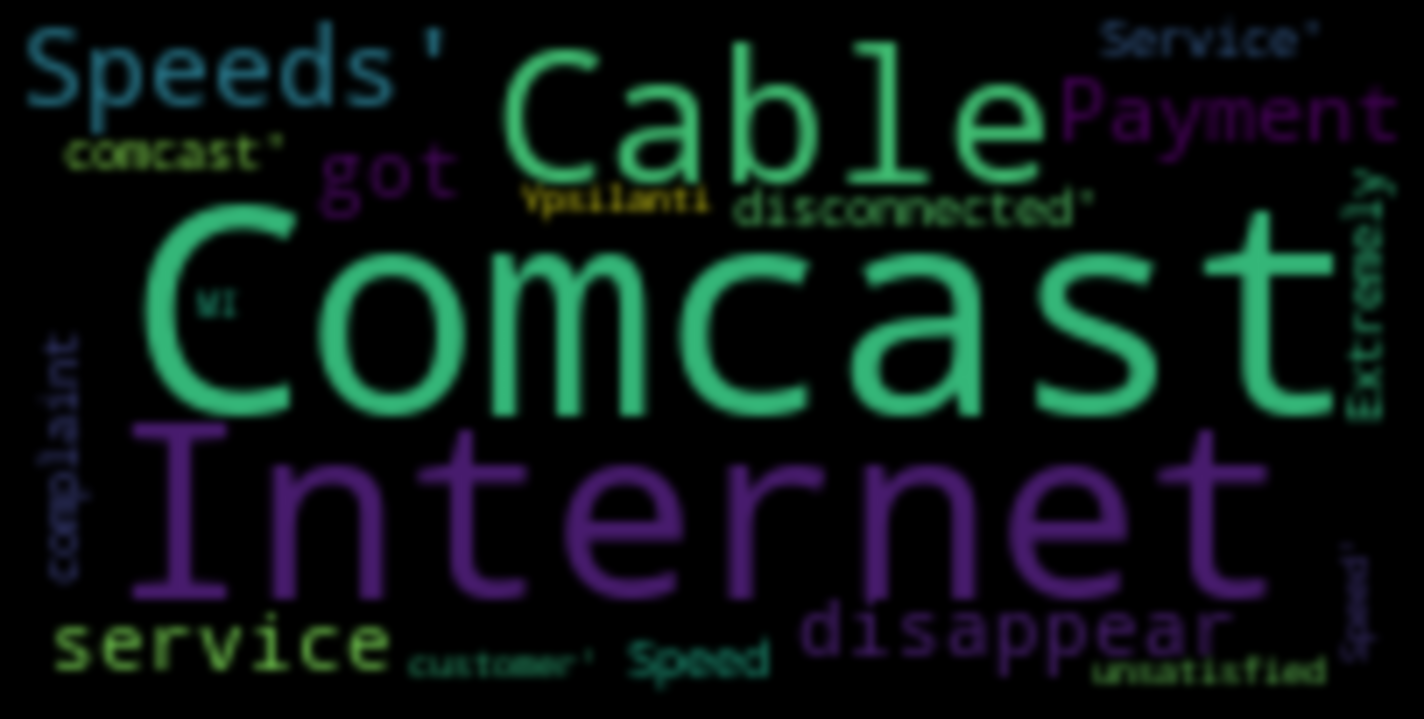

In [67]:
fig = plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation='bicubic')
plt.axis("off")
plt.tight_layout()
plt.show()

###### Here we can conclude that complains for Internet and customer care calls are the most.

##### Now we need to get the frequency of perticular complain type, for that we are doing this following process.

In [74]:
!pip install nltk




In [90]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rautn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rautn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [76]:
from nltk.stem.wordnet import WordNetLemmatizer

In [77]:
import string

In [85]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [95]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalised

In [96]:
doc_complete = df["Customer Complaint"].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [97]:
!pip install gensim
from gensim import corpora

In [98]:
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [101]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [100]:
from gensim.models import LdaModel

In [102]:
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics = NUM_TOPICS, id2word=dictionary, passes=30)

In [104]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.040*"comcast" + 0.032*"bandwidth" + 0.030*"broadband" + 0.029*"bill" + 0.028*"xfinitycomcast" + 0.026*"time" + 0.026*"several" + 0.022*"hbo" + 0.022*"change" + 0.021*"go"')

(1, '0.173*"internet" + 0.149*"comcast" + 0.057*"charge" + 0.033*"slow" + 0.030*"pricing" + 0.027*"throttling" + 0.024*"bill" + 0.021*"comcastxfinity" + 0.020*"contract" + 0.016*"overage"')

(2, '0.293*"service" + 0.104*"comcast" + 0.101*"internet" + 0.054*"customer" + 0.029*"poor" + 0.011*"billed" + 0.011*"terrible" + 0.010*"failure" + 0.009*"bad" + 0.009*"horrible"')

(3, '0.146*"data" + 0.138*"comcast" + 0.118*"cap" + 0.048*"practice" + 0.035*"xfinity" + 0.035*"billing" + 0.028*"usage" + 0.027*"unfair" + 0.022*"internet" + 0.017*"deceptive"')

(4, '0.210*"comcast" + 0.070*"service" + 0.066*"complaint" + 0.020*"paying" + 0.018*"problem" + 0.015*"get" + 0.014*"refund" + 0.013*"without" + 0.012*"credit" + 0.012*"day"')

(5, '0.080*"price" + 0.047*"comcast" + 0.033*"monopoly" + 0.030*"2" + 0.022*"email" + 0.0

In [106]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Top # " + "{}".format(i+1)] = [i[0] for i in words]
    

In [108]:
pd.DataFrame(word_dict)

,Top # 1,Top # 2,Top # 3,Top # 4,Top # 5,Top # 6,Top # 7,Top # 8,Top # 9
0,comcast,internet,service,data,comcast,price,speed,comcast,billing
1,bandwidth,comcast,comcast,comcast,service,comcast,internet,connection,comcast
2,broadband,charge,internet,cap,complaint,monopoly,comcast,fee,issue
3,bill,slow,customer,practice,paying,2,cable,help,fraudulent
4,xfinitycomcast,pricing,poor,xfinity,problem,email,outage,charging,charge
5,time,throttling,billed,billing,get,option,bill,monthly,modem
6,several,bill,terrible,usage,refund,mb,payment,month,equipment
7,hbo,comcastxfinity,failure,unfair,without,one,high,bill,charged
8,change,contract,bad,internet,credit,lack,promised,installation,lied
9,go,overage,horrible,deceptive,day,equipment,slowing,without,claim


#### Here we can conclude that Top # 1 is having complaints for Internet issue.

#### INSIGHT: Closed percentage of complaint received via call = 77.21% and closed issue complaints via internet are 76.29%

##### here its done.